In [19]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import yfinance as yf

In [20]:
# Download stock price data
def download_stock_data(ticker, start_date, end_date):
    stock_data = yf.download(ticker, start=start_date, end=end_date)
    return stock_data['Adj Close']

# Preprocess data and create input sequences
def preprocess_data(data, sequence_length):
    sequences = []
    for i in range(len(data) - sequence_length):
        sequence = data.iloc[i:i+sequence_length].values  # Use iloc to get the rows
        target = data.iloc[i + sequence_length].values    # Use iloc to get the target row
        sequences.append((sequence, target))
    return sequences

# Split data into training and testing sets
def split_data(data, test_size=0.2):
    train_data, test_data = train_test_split(data, test_size=test_size, shuffle=False)
    return train_data, test_data

# Train linear regression model
def train_model(X_train, y_train):
    model = LinearRegression()
    model.fit(X_train, y_train)
    return model

# Evaluate model on test data
def evaluate_model(model, X_test, y_test):
    predictions = model.predict(X_test)
    mse = mean_squared_error(y_test, predictions)
    return mse

In [21]:
# Download stock data
ticker = 'GOOGL'
start_date = '2020-01-01'
end_date = '2024-02-25'
stock_data = download_stock_data(ticker, start_date, end_date)

[*********************100%%**********************]  1 of 1 completed


[*********************100%%**********************]  1 of 1 completed

                 Open       High        Low      Close  Adj Close    Volume
Date                                                                       
2020-01-02  67.420502  68.433998  67.324501  68.433998  68.355545  27278000
2020-01-03  67.400002  68.687500  67.365997  68.075996  67.997955  23408000
2020-01-06  67.581497  69.916000  67.550003  69.890503  69.810379  46768000
2020-01-07  70.023003  70.175003  69.578003  69.755501  69.675537  34330000
2020-01-08  69.740997  70.592499  69.631500  70.251999  70.171463  35314000


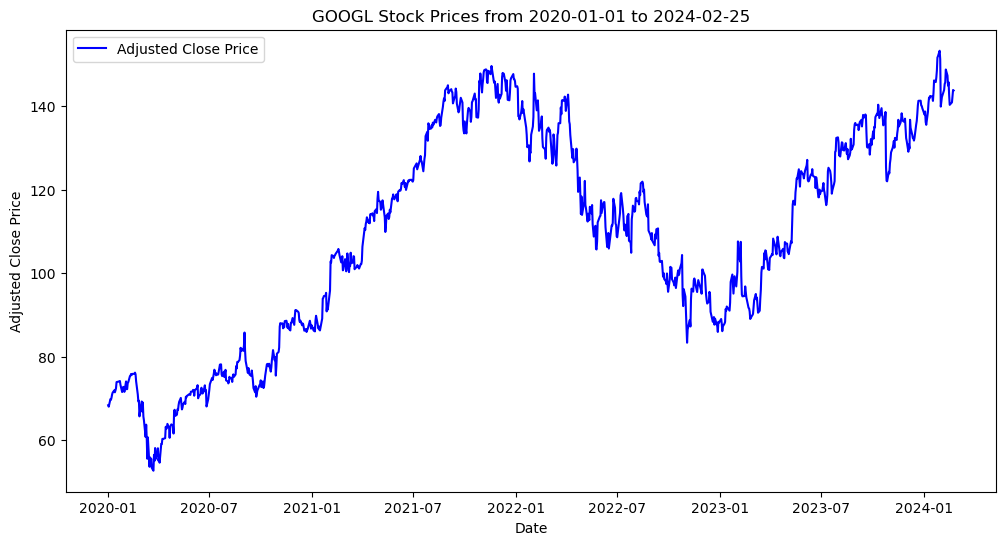

In [22]:
import matplotlib.pyplot as plt

# Download stock data
ticker = 'GOOGL'
start_date = '2020-01-01'
end_date = '2024-02-25'
stock_data = yf.download(ticker, start=start_date, end=end_date)

# Display the first few rows of the DataFrame
print(stock_data.head())

# Plotting the closing prices
plt.figure(figsize=(12, 6))
plt.plot(stock_data.index, stock_data['Adj Close'], label='Adjusted Close Price', color='blue')
plt.title(f'{ticker} Stock Prices from {start_date} to {end_date}')
plt.xlabel('Date')
plt.ylabel('Adjusted Close Price')
plt.legend()
plt.show()

In [23]:
# Preprocess data
sequence_length = 10
data_sequences = preprocess_data(stock_data, sequence_length)

In [24]:
# Split data into training and testing sets
train_data, test_data = split_data(data_sequences)

In [25]:
# Prepare training data
X_train = np.array([item[0] for item in train_data])
y_train = np.array([item[1] for item in train_data])

# Reshape X_train to 2D: (number of samples, sequence_length * number of features)
X_train_reshaped = X_train.reshape(X_train.shape[0], -1)

# Train linear regression model
model = train_model(X_train_reshaped, y_train)

In [26]:
# Prepare testing data
X_test = np.array([item[0] for item in test_data])
y_test = np.array([item[1] for item in test_data])

# Example of using the trained model for prediction
last_sequence = X_test[-1].reshape(1, -1)
predicted_price = model.predict(last_sequence)[0]
print(f'\nPredicted Stock Price: {predicted_price}')


Predicted Stock Price: [1.44269644e+02 1.45729113e+02 1.42998619e+02 1.44283626e+02
 1.44118109e+02 3.04295734e+07]


In [27]:
X_test_reshaped = X_test.reshape(X_test.shape[0], -1)

# Evaluate model using Mean Squared Error
mse = evaluate_model(model, X_test_reshaped, y_test)

# Evaluate model using R-squared
r2 = r2_score(y_test, model.predict(X_test_reshaped))

# Calculate Adjusted R-squared (adjusts for number of features)
n = X_test.shape[0]  # Number of samples
p = X_test.shape[1]  # Number of features

adjusted_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)

# Print the R-squared and adjusted R-squared
print(f'\nR-squared: {r2:.4f}')
print(f'Adjusted R-squared: {adjusted_r2:.2f}')
print(f'Mean Squared Error on Test Data: {mse: 0.2f}')


R-squared: 0.8222
Adjusted R-squared: 0.81
Mean Squared Error on Test Data:  17225370039894.89
